# Toxic Comment Classification Project.

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import seaborn as sns
import matplotlib.cm as cm
import itertools
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hemant./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hemant./nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/hemant./nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('toxic-comments.csv')

In [3]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [4]:
df.shape

(159571, 8)

In [5]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [6]:
df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [7]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


# EDA

In [9]:
# finding all the rows where the sum of labels is zero i.e the comment is a Clean comment
rowsums=df.iloc[:,2:].sum(axis=1) #startcounting from 2nd column since the first two columns are ID and text
df['clean']=(rowsums==0)
df['clean'].sum() #sum the number of clean rows

143346

In [10]:
# Total no.of toxic comments
len(df[df['toxic']==1])

15294

In [11]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,True
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,False
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,True
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,True
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,True


In [12]:
df = df.drop(['id'], axis=1)

In [13]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True


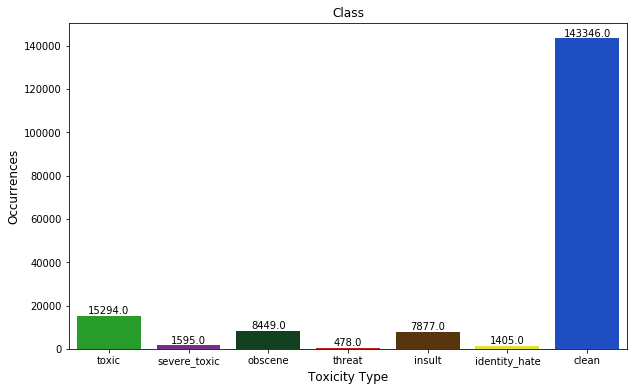

In [14]:
colors_list = ["green", "purple","pine green","red", "brown","yellow", "blue"]

palette= sns.xkcd_palette(colors_list)

x=df.iloc[:,1:].sum()

plt.figure(figsize=(10,6))
# x.index has all the toxicity labels and x.values has their respective count
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Class")
plt.xlabel('Toxicity Type', fontsize = 12)
plt.ylabel('Occurrences', fontsize=12)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height() #used to display the exact number of comments in each column on the top of the plots.
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

plt.show()

# Taking an insight of the length of the comments in the dataset.

In [15]:
comment = df['comment_text']
for i in range(10):
    print(i,"- " + comment[i] + "\n Length -" ,len(comment[i]))

0 - Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
 Length - 264
1 - D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
 Length - 112
2 - Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
 Length - 233
3 - "
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have a

In [16]:
x = np.array([len(comment[i]) for i in range(comment.shape[0])])

In [17]:
print("""The maximum length of comment is:{} 
        \nThe minimum length of the comment is:{} 
        \nAnd the average length of a comment is: {}""".format(x.max(),x.min(),x.mean()))

The maximum length of comment is:5000 
        
The minimum length of the comment is:6 
        
And the average length of a comment is: 394.0732213246768


The average length of comment is : 394.073


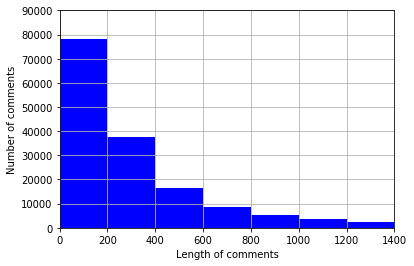

In [18]:
print('The average length of comment is : 394.073' )
bins = [1,200,400,600,800,1000,1200,1400]
plt.hist(x, bins=bins, color = 'Blue')
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1400, 0, 90000])
plt.grid(True)
plt.show()

In [19]:
label = df[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head(10))
label = label.to_numpy()

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0
5      0             0        0       0       0              0
6      1             1        1       0       1              0
7      0             0        0       0       0              0
8      0             0        0       0       0              0
9      0             0        0       0       0              0


In [20]:
label.shape

(159571, 6)

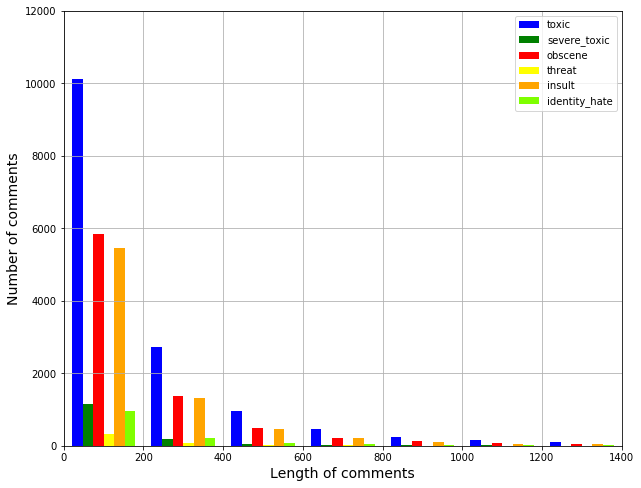

In [21]:
# Creating a zero matrix of shape (159571,6)
y = np.zeros(label.shape)
for i in range(label.shape[0]):
    l = len(comment[i])
    if label[i][0] :
        y[i][0] = l
    if label[i][1] :
        y[i][1] = l
    if label[i][2] :
        y[i][2] = l
    if label[i][3] :
        y[i][3] = l
    if label[i][4] :
        y[i][4] = l
    if label[i][5] :
        y[i][5] = l

label_plot = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
color = ['blue','green','red','yellow','orange','chartreuse']    
plt.figure(figsize = (10,8))
plt.hist(y,bins = bins,label = label_plot,color = color)
plt.axis([0, 1400, 0, 12000])
plt.xlabel('Length of comments', fontsize = 14)
plt.ylabel('Number of comments', fontsize = 14) 
plt.legend()
plt.grid(True)
plt.show()

# Remove excessive length comments

In [22]:
# creating a list of comments with less than 400 length of words.
trim_comments = [comment[i] for i in range(comment.shape[0]) if len(comment[i])<=400 ]

# creating corresponding labels for those comments
my_labels = np.array([label[i] for i in range(comment.shape[0]) if len(comment[i])<=400 ])


Now, you check the labels created

In [23]:
my_labels[:10, :]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [24]:
print(len(trim_comments))
print(my_labels.shape)

115910
(115910, 6)


In [25]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

lemma = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'http\S+', ' ', text)        # removing the url

    text = re.sub('[^a-zA-Z]', ' ', text)       # removing Numbers and punctuation

    text = str(text).lower()                   # Covert all caharters into lowercase

    text = word_tokenize(text)                 # tokenization

    text = [item for item in text if item not in stop_words] # Removing Stop words

    text = [stemmer.stem(lemma.lemmatize(w,pos="v")) for w in text]  # lemmatization

    text = [i for i in text if len(i) > 2] # remove the words having length <= 2

    text = ' '.join(text)
    
    return text
  

    

In [26]:
clean_text(trim_comments[2])

'hey man realli tri edit war guy constantli remov relev inform talk edit instead talk page seem care format actual info'

In [27]:
for i in range(len(trim_comments)):
    trim_comments[i] = clean_text(trim_comments[i])

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(stop_words=stop_words)

tf = count_vector.fit_transform(trim_comments[:20000]).toarray()

In [29]:
tf.shape

(20000, 23170)

# Splitting into training and testing

In [30]:
def shuffle(matrix, target, test_proportion):
    ratio = int(matrix.shape[0]/test_proportion)
    X_train = matrix[ratio:,:]
    X_test =  matrix[:ratio,:]
    Y_train = target[ratio:,:]
    Y_test =  target[:ratio,:]
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = shuffle(tf, my_labels[:20000],3)

print(X_test.shape)
print(X_train.shape)

(6666, 23170)
(13334, 23170)


# Hamming and Log loss

In [31]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

## 1. Binary Relevance (BR) Method with MultinomialNB classifiers

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
# clf will be the list of the classifiers for all the 6 labels
# each classifier is fit with the training data and corresponding classifier
clf = []
for i in range(6):
    clf.append(MultinomialNB())
    clf[i].fit(X_train,Y_train[:,i])

In [34]:
# predict list contains the predictions, it is transposed later to get the proper shape
predict = []
for i in range(6):
    predict.append(clf[i].predict(X_test))

predict = np.asarray(np.transpose(predict))
print(predict.shape)

(6666, 6)


In [35]:
evaluate_score(Y_test,predict)

Hamming_loss : 3.67036703670367
Accuracy : 87.56375637563757
Log_loss : 1.951826961526381


## 2. BR Method with GaussianNB classifier.

In [36]:
from sklearn.naive_bayes import GaussianNB
#create and fit classifiers
clf = []
for i in range(6):
    clf.append(GaussianNB())
    clf[i].fit(X_train,Y_train[:,i])

In [37]:
#predictions
predict = []
for ix in range(6):
    predict.append(clf[ix].predict(X_test))

In [38]:
#calculate scores
predict = np.asarray(np.transpose(predict))
evaluate_score(Y_test,predict)

Hamming_loss : 13.373837383738374
Accuracy : 64.32643264326433
Log_loss : 1.6576572516355863


# Result Visualisation.

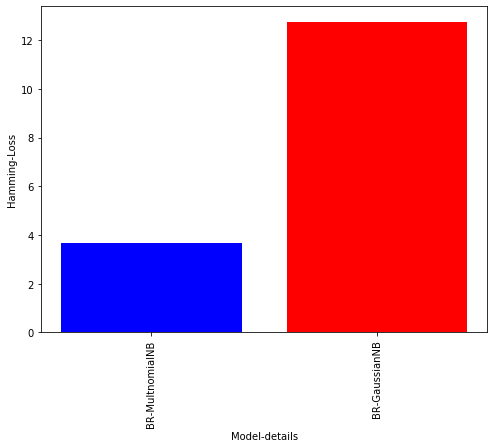

In [39]:
x = ['BR-MultnomialNB','BR-GaussianNB']
y = [3.65,12.75]
colors = itertools.cycle(['b', 'r'])
plt.figure(figsize= (8,6))
plt.ylabel('Hamming-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

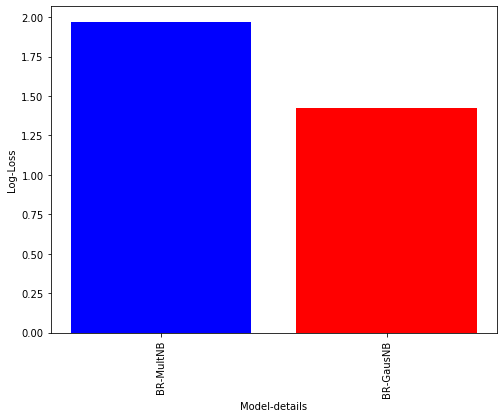

In [40]:
x = ['BR-MultNB','BR-GausNB']
y = [1.97,1.422]
colors = itertools.cycle(['b', 'r'])
plt.figure(figsize=(8,6))
plt.ylabel('Log-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()